Created on Tuesday 12 January 2021

**Group 5 - Classification  
New document prediction unsupervised unsupervised with t-SNE v1**

@authors : Alice Airault

We always want to detect new articles, i.e. documents that provide different information to others. To do this, we use the BoW provided by group 3 as a vector representation (as it was the one that obtained the best results in the first version).  
For this second method, we decided to carry out a size reduction with t-distributed Stochastic Neighbor Embedding (t-SNE) on our BoW. Then to apply one of the unsupervised algorithms used in the first part (LOF, Isolation Forest and One SVM).


# Import librairies

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Create link between drive and notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import data

In [3]:
# Create dataframe with BoW data of group 3
data_bow: pd.DataFrame = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/g3_BOW_v1.json")

# Create dataframe that with BoW data
data = data_bow.copy()
data.drop(["art_id", "art_content_clean_without_lem"], axis=1, inplace=True)

# Functions

## Word cloud with its preprocessing

In [4]:
# Generates a word cloud for an article
def wordcloud_art(text: str):
    """Documentation
    Parameters:
        text: the article that will be show on the word cloud
    """
    text: str = preprocessing(text)
    if len(text) > 0:
        wordcloud: str = WordCloud(relative_scaling=1.0,).generate(str(text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print("The article have a size of 0.")

In [5]:
def preprocessing(sentence: str) -> str:
    """Documentation
    Parameters:
        data: 1 column of a dataframe especially choose because we want a column who contain only text

    Out (if exists):
        liste_return: liste of all the text of the dataframe return with preprocessing applied
    """
    stop_words: set = set(stopwords.words('french'))
    pattern: list = ['(', ')', ':', ';', ',', '&', '/',
               '"', "'", '\n', '©', 'n°', '-']
    if not isinstance(sentence, str):
        sentence: str = str(sentence)

    sentence: str = re.sub(r'\d', ' ', sentence)

    sentence: str = sentence.lower()

    for d in pattern:
        sentence: str = sentence.replace(d, " ")

    token_words: list = word_tokenize(sentence)
    filtre: type = [w for w in token_words if not w in stop_words]

    final_list: str = ""
    for word in filtre:
        final_list: str = final_list + word + " "
    return(final_list)

## Visualization 2D or 3D

In [6]:
def graphs(data: np.ndarray, view:str = '2d'): # -> np.Figure:
  """Documentation
  Parameters:
      data: the t-SNE array
      view: graph in '2d' or '3d'
  Output:
      model representation in 2d or 3d 
  """

  data_plot: pd.DataFrame = pd.DataFrame(data)
  data_plot["prediction"] = pred
  data_plot["pred"] = data_plot["prediction"].apply(lambda x: 'Old' if x == 1 else 'New') 

  data_plot_new: pd.DataFrame = data_plot[data_plot["pred"] == "New"]
  data_plot_old: pd.DataFrame = data_plot[data_plot["pred"] == "Old"]

  if view == '2d':
    fig = px.scatter(data_plot, x= 0, y= 1, color='pred', opacity=0.6)
  elif view == '3d':
    fig = px.scatter_3d(data_plot, x= 0, y= 1, z= 2, color='pred', opacity=0.6)

  fig.show()

# Dimension reduction with t-SNE

In [7]:
# Normalisation
sc: StandardScaler = StandardScaler()
X: np.ndarray = sc.fit_transform(data)

# t-SNE
tsne: TSNE = TSNE(n_components=3)
X: np.ndarray = tsne.fit_transform(X)

# Models

## Local Outlier Facor (LOF)

In [8]:
# Prediction BoW-G3 with LOF
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
pred: np.ndarray = clf.fit_predict(X)
pd.Series(pred).value_counts()

 1    6779
-1     754
dtype: int64

In [9]:
graphs(X, '2d')

In [10]:
graphs(X, '3d')

## One Support Vector Machine (One SVM)

In [11]:
# Prediction BoW-G3 with One SVM
one_svm: OneClassSVM = OneClassSVM(gamma='auto', nu = 0.03).fit(data)
pred: np.ndarray = one_svm.predict(data)
score: np.ndarray = one_svm.decision_function(data)
pd.Series(pred).value_counts()

 1    7305
-1     228
dtype: int64

In [12]:
graphs(X, '2d')

In [13]:
graphs(X, '3d')

## Isolation Forest

In [14]:
# Prediction BoW-G3 with Isolation Forest
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.01)
pred: np.ndarray = clf.fit_predict(X)
score: np.ndarray = clf.decision_function(X)
pd.Series(pred).value_counts()

 1    7457
-1      76
dtype: int64

In [15]:
graphs(X, '2d')

In [16]:
graphs(X, '3d')

In [17]:
# Prediction BoW-G3 with Isolation Forest
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.003)
pred: np.ndarray = clf.fit_predict(X)
score: np.ndarray = clf.decision_function(X)
pd.Series(pred).value_counts()

 1    7510
-1      23
dtype: int64

In [18]:
graphs(X, '2d')

# Word cloud for Isolation forest (because best results just before)

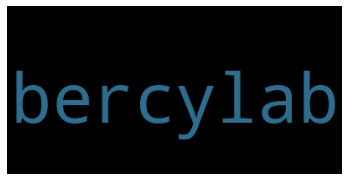

bercylab
None


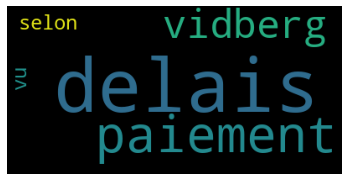

delais paiement selon vidberg delais paiement vu vidberg
None


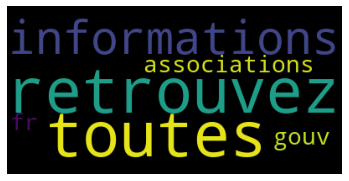

retrouvez toutes informations www associations gouv fr
None


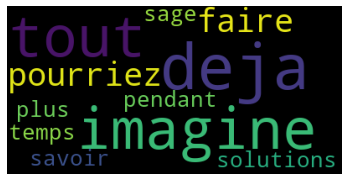

deja imagine tout pourriez faire pendant temps savoir plus solutions sage
None


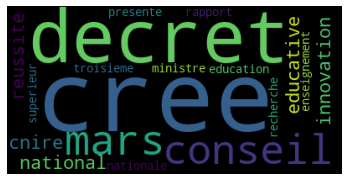

cree decret mars conseil national innovation reussite educative cnire presente troisieme rapport ministre education nationale enseignement superieur recherche
None


In [19]:
# Create a new dataframe with the score
df = data.copy()
df['index']=data.index
df['score']=score

# Retrieve the text of the articles
mycolumns = ['art_id', 'art_content_clean_without_lem']
data_bow = data_bow[mycolumns]

# Merge the text with its decision score 
df_new = pd.merge(data_bow, df, left_on='art_id', right_on='index')

# Sort scores from smallest to largest 
df_sort = df_new.sort_values(by = 'score')
df_sort = df_sort.reset_index()
df_sort = df_sort.drop(['level_0'], axis=1)

# Display the first 5 most different texts and word clouds
for i in range(5):
  txt = df_sort['art_content_clean_without_lem'][i]
  wordcloud = wordcloud_art(txt)
  print(txt)
  print(wordcloud)

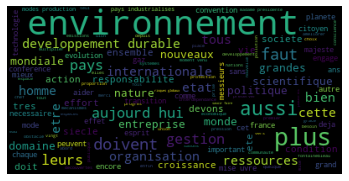

madame presidente merci action bien merci aussi avoir choisi fontainebleau eme anniversaire tres sensibles majeste merci tout coeur presence voudrais profiter cette occasion demander egalement transmettre majeste roi jordanie abord tous sentiments estime reconnaissance role si important ete sien difficile negociation wye river grace choses pu progresser paix retrouver chances comme savons evoque traitement majeste subi succes alors demande nom cette uicn dont etes marraines bien vouloir transmettre voeux tres rapide tres complet retablissement messieurs chefs etat mesdames messieurs celebrer anniversaire union mondiale nature voulu revenir sources cette ville fontainebleau federation naquit heureux trouver parmi aujourd hui celebrer cet evenement uicn peut prevaloir juste titre place unique parmi organisations internationales rassemble etats associations scientifiques vue confier responsabilite mise uvre importants traites assume missions exigeantes celles ong action pedagogique prise 

In [20]:
# One text and its word cloud
txt = df_sort['art_content_clean_without_lem'][20]
wordcloud = wordcloud_art(txt)
print(txt)
print(wordcloud)

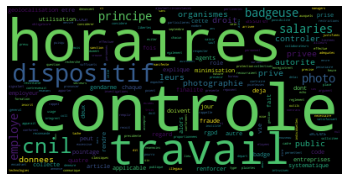

sollicitee employes secteurs prive public deux ans cnil annonce aout mettre demeure entreprises recourraient badgeuses photo controler horaires leurs collaborateurs organismes dont nombre precise delai trois mois rendre leurs dispositifs controle horaires conformes rgpd cas contraire presidente possibilite saisir formation restreinte cnil pourra alors prononcer sanction pecuniaire rendre celle ci publique communique gendarme vie privee explique considerer utilisation badgeuses photo organismes contrevenait principe minimisation autrement dit collecte obligatoire systematique deux quatre fois jour photographie employe chacun pointages apparait excessive explique autorite ajoutant dispositifs controle reposent technologies intrusives principe deja inscrit code travail rappel faits cnil recoit six plaintes emanant agents publics salaries entreprises privees denoncent mise place employeur badgeuses photo lieu travail dispositifs controle acces badge integrent prise photographie systematiqu

In [21]:
# One text and its word cloud
txt = df_sort['art_content_clean_without_lem'][33]
wordcloud = wordcloud_art(txt)
print(txt)
print(wordcloud)

# Result for a t-SNE of 128 dimension

In [22]:
df_x: pd.DataFrame = pd.read_csv("/content/drive/My Drive/G5 Inter-Promo 2021/Données/Output/Doublons/X_Ncomponents_128.csv")
df_x.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0,-0.093392,-0.173249,-0.030164,-0.221936,0.080819,-0.111201,-0.689377,-1.237082,0.163082,0.018343,-0.164520,0.084782,0.420187,0.022905,0.242661,0.103610,0.232676,-0.239056,0.194805,0.233067,-0.042408,0.298758,0.056627,-0.628041,-0.165814,-0.099932,0.096432,-0.007619,0.035687,-0.688920,0.471225,0.047821,0.288907,-0.376799,-0.011532,-0.118455,1.078428,0.004525,-0.001229,...,0.120385,-0.094784,-0.227434,-0.170360,-0.106784,0.556123,-0.167748,-0.072325,-0.037538,-0.032797,-0.120143,0.312160,-0.343609,-0.500590,0.686991,0.769069,-0.543764,0.318711,-0.298440,1.045886,-0.224384,0.111007,0.334909,-0.206693,-0.039039,-0.102852,-0.566847,-0.516881,0.559180,0.239880,-0.056475,-0.271386,0.004901,0.159202,0.048482,-0.037488,0.194267,-0.431514,0.642962,0.596491
1,1,-0.036324,0.058548,-0.055203,0.011506,0.040759,1.695987,0.152760,-0.174940,-0.015808,0.061724,0.039374,-0.196090,0.046493,-0.042397,-0.118948,-0.001272,-0.095463,0.166151,-0.120695,0.154074,0.064884,-0.102759,0.021861,0.425027,-0.053043,-0.083450,0.043289,-0.030927,0.058224,0.085175,0.602543,0.029785,0.480793,0.216701,0.312543,-0.334602,-0.071716,-0.007493,-0.033666,...,0.009609,0.038471,-0.577564,-0.041243,0.092210,2.318397,0.084253,0.024459,0.051116,-0.109247,-0.025513,-1.127854,0.374688,0.062223,-0.117960,0.275489,0.054328,-0.109768,-0.075380,-0.045760,0.025570,-0.077439,-0.231912,0.970467,-0.105596,-0.001891,0.018705,-0.177222,-0.205766,-0.215829,-0.035107,-0.062919,-0.011909,-0.099045,-0.075852,-0.495478,-0.119602,0.087933,-0.252565,-0.008129
2,2,0.137965,-0.257171,-0.033816,1.377575,0.245086,0.046986,0.049662,0.113388,-0.019064,-0.020901,-0.108081,0.175711,0.151691,0.224663,0.842997,0.272337,0.022978,-0.255725,-0.069850,0.092389,-0.016730,0.008770,0.012039,-0.127064,-0.022164,0.035684,-0.108863,-0.085512,0.022454,-1.026649,0.540966,0.035234,0.830284,-0.052133,0.401121,-0.110305,0.051367,0.008247,0.060485,...,-0.085261,0.420641,0.164195,-0.020332,-0.015076,0.073342,-0.219614,0.029996,0.938649,0.547729,-0.028015,-0.080957,-0.040586,0.422846,-0.105938,0.000852,0.011930,-0.018056,-0.271464,0.052511,-0.132594,-0.002290,-0.112892,1.040551,-0.081219,0.009904,0.005103,-0.111373,-1.115752,0.493231,-0.072606,-0.086400,-0.203144,-0.013731,-0.154450,-0.071719,0.127177,-0.090426,1.081948,-0.035127
3,3,-0.029856,0.324976,-0.076753,0.030058,-0.000109,-0.048060,-1.108587,-0.828359,-0.200002,0.004737,0.060801,0.004483,1.154734,-0.016458,0.453258,-0.344958,0.025804,0.343835,-0.082644,0.009585,-0.029007,-0.449078,-0.007370,0.239305,0.270797,0.263928,0.037880,0.061532,0.181876,0.117258,-0.341171,0.199054,0.114582,-0.193977,-0.214188,0.243121,0.270426,-0.004304,-0.030236,...,0.009770,-0.005562,1.006467,0.028748,-0.081100,0.628599,0.240006,-0.004306,-0.007954,-0.122624,0.009437,-0.553814,-0.575179,0.015172,-1.314126,1.786338,0.490077,0.536509,0.110229,0.132564,0.055370,0.074782,0.190722,-0.281209,-0.381509,0.002517,-0.033121,-0.521799,-0.073933,0.518995,-0.000908,0.805155,-0.020271,-0.007904,-0.113284,0.256448,0.132323,0.046040,-0.228667,0.382992
4,4,0.031374,0.184088,0.017415,0.152368,-0.368940,-0.044269,-0.673822,-0.558631,0.096743,0.012890,0.073234,0.074458,1.189296,-0.084559,0.247588,-0.299930,0.028534,-0.065280,0.113356,0.129747,-0.586409,-1.187918,-0.193784,1.779448,1.084553,0.368510,0.119711,-0.094630,-0.125988,-0.444406,-0.084430,-0.018961,1.191259,1.334768,-0.022623,-0.122743,-0.038545,-0.007838,-0.007477,...,0.250264,-0.008426,0.632033,0.216476,-0.084305,0.697289,0.018421,-0.093905,0.210230,0.210927,0.012908,-0.276545,-0.436753,-0.021519,-1.351385,1.001380,-0.037224,0.371213,0.402341,-0.249671,0.180985,0.090094,0.345135,0.085016,-0.751078,-0.006649,-0.135114,0.376476,-0.282089,0.153502,-0.006049,0.211800,-0.051315,-0

In [23]:
df_x.drop("Unnamed: 0", axis=1)
x_128 = df_x.values

In [24]:
graphs(x_128, '2d')

In [25]:
graphs(x_128, '3d')